
# First Step into Quantum Computing

- Difficulties: Beginner
- QPU time usage: 11s

Welcome, hackers! We're thrilled to have you for the workshop. The main goal of this introductory hands-on is to make you ready for your quantum journey by 1) guiding you how to install qiskit 2) how to create IBM Cloud account and prepare `api_key` and `crn` to use a real quantum computer and 3) make your first quantum circuit, 4) solve a quantum state quiz and 5) Run you circuits on the real quantum computer and plot the result.


## 1. First things first: Qiskit

### What is Qiskit

<img src="https://www.ibm.com/quantum/images/qiskit/qiskit-community.svg">

The **[Qiskit SDK](https://www.ibm.com/quantum/qiskit)** is a high performance software stack built to help developers and researchers harness the full power of quantum computers at the utility scale and beyond. At its core is the Qiskit SDK, an open source software development kit for working with quantum computers at the level of extended quantum circuits. Operators and primitives. The Qiskit SDK allows anyone to get optimal performance from real quantum computers using their preferred computing environment. 

Beyond the SDK, Qiskit also includes a suite of high performance tools and services like [Qiskit Runtime Service](https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/runtime-service), which enables optimized computations at IBM quantum computers through the cloud using primitives that manage error mitigation. The Qiskit Transpiler service, which provides state of the art heuristic and AI powered methods that boost performance for common quantum circuit optimization tasks. 

[Qiskit functions](https://quantum.cloud.ibm.com/docs/en/guides/functions), a catalog of IBM and third party services that make it easy to optimize workloads and leverage Qiskit for industry use cases. Whether you're a quantum software developer, a quantum experimentalist, a computational scientist, or just looking to get started Qiskit’s modular, flexible framework lets you work at the abstraction level that best suits your needs. 

Qiskit is designed for extensibility and customization, so you can extract industry leading performance and tackle new kinds of problems. A high performance code base means a Qiskit SDK works faster, uses less memory, and delivers better results than ever before. And Qiskit also introduces you to a vast community of users and developers who are eager to welcome you and help answer your questions. First launched in 2019, [the Qiskit advocate program](https://www.ibm.com/quantum/community#advocates) is a global, community-centered initiative that recruits quantum computing professionals and enthusiasts from all over the world. Over the years, advocates have gone on to become recognized leaders in the quantum community. Want to be a next quantum leader? Don't hesitate to apply - [here](https://airtable.com/app8koO4BZifGFhCV/shrdoH8gIf6MOJ8bn)

### Install Qiskit

First, check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version we will use

``` python
from platform import python_version

print(python_version())
```
If that is not the case, you can upgrade it using your preferred tool. If you are unsure how to do it, some recommended options are:

- MacOS: [Homebrew](https://brew.sh/)
- Linux: `sudo apt-get update `

A detailed guide on how to upgrade Python depending on your OS is detailed here: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)


For more information take a look at the QGSS(Qiskit Global Summer School) 2025 wiki: https://github.com/qiskit-community/qgss-2025/wiki/Jupyter-Notebook-Environment-(Local-and-Online)

You can verify your installation by running the cell below. If you installed correctly, it will return the qiskit version.

In [1]:
import qiskit

print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.1.2


### Troubleshooting

If the previous cell raised an error, you can opt to install Qiskit in a virtual environment (two suggested methods follow). If you have no errors, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## 2. Set up your IBM Cloud account <a id="setting-ibm-cloud"></a>

To use a real quantum computer, you need an `api key` - a main entrance ticket to the cloud and a `crn` - token that will bring your resources to you by setting your account.

Set up your account as follows:

1. Go to the [IBM Quantum&reg; Platform](https://quantum.cloud.ibm.com/).
2. Go to the top right corner (as shown in the above picture), create your API token, and copy it to a secure location.
3. In the next cell, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the bottom left corner (as shown in the above picture) and **create your instance**. Make sure to choose the open plan.
5. After the instance is created, copy its associated CRN code. You may need to refresh to see the instance.
6. In the cell below, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

See [this guide](https://quantum.cloud.ibm.com/docs/guides/cloud-setup) for more details on how to set up your IBM Cloud&reg; account.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.

Additionally, if you are a member of the IBM partner network university, please use your institution's email address for your IBM ID to receive the partner benefit. 
</div>


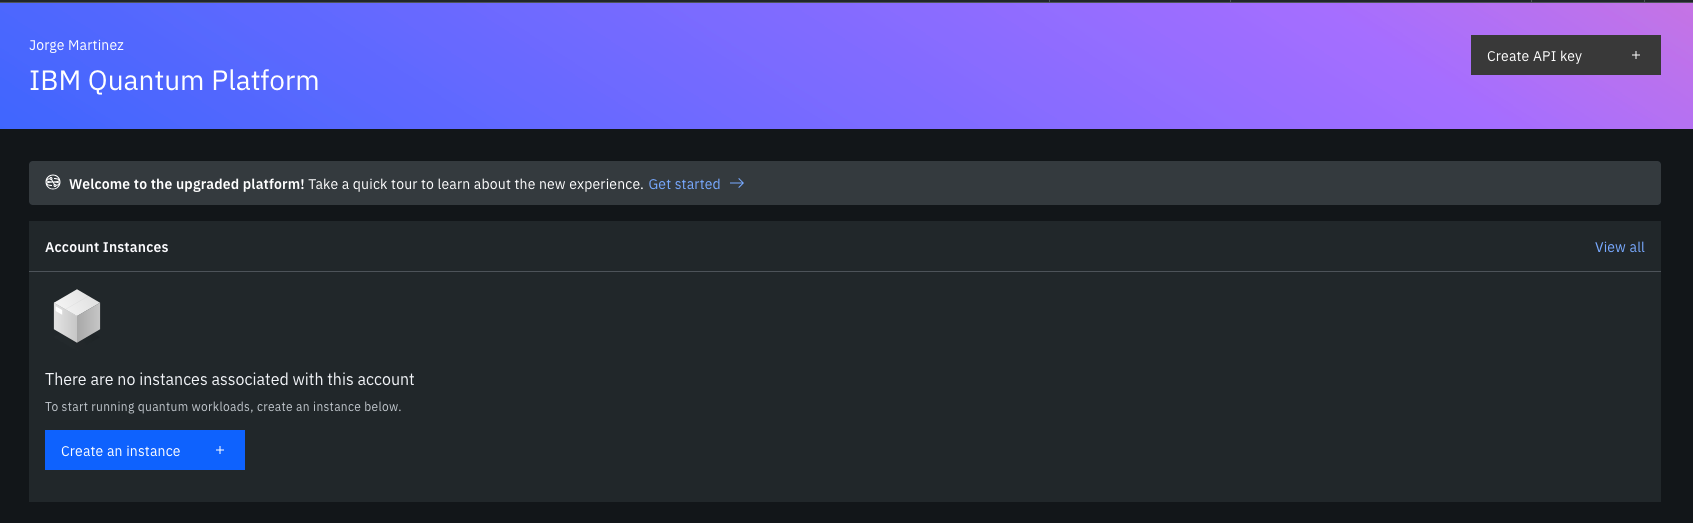




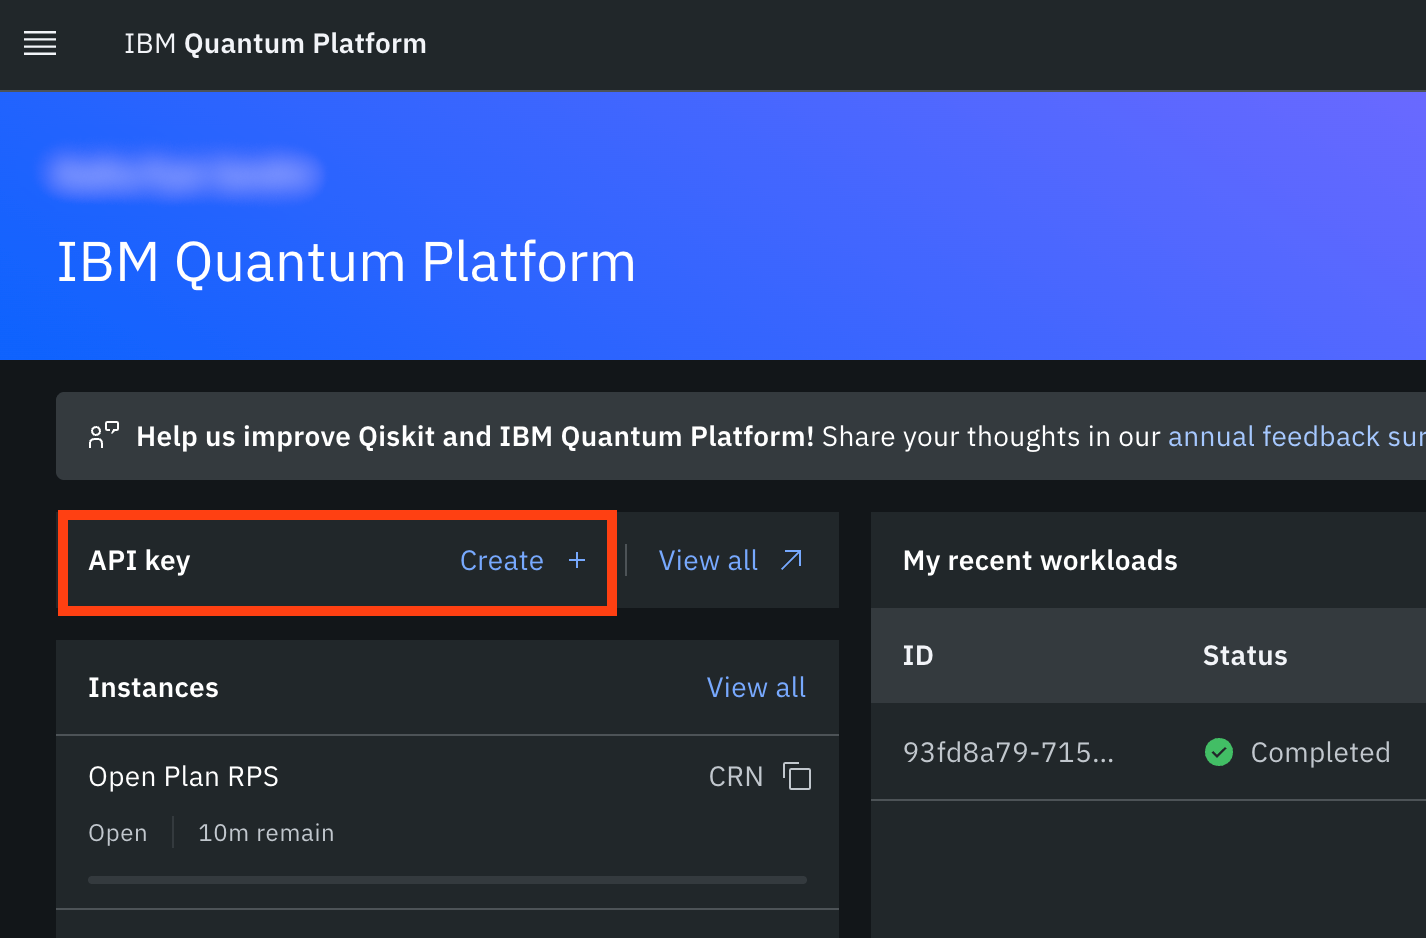

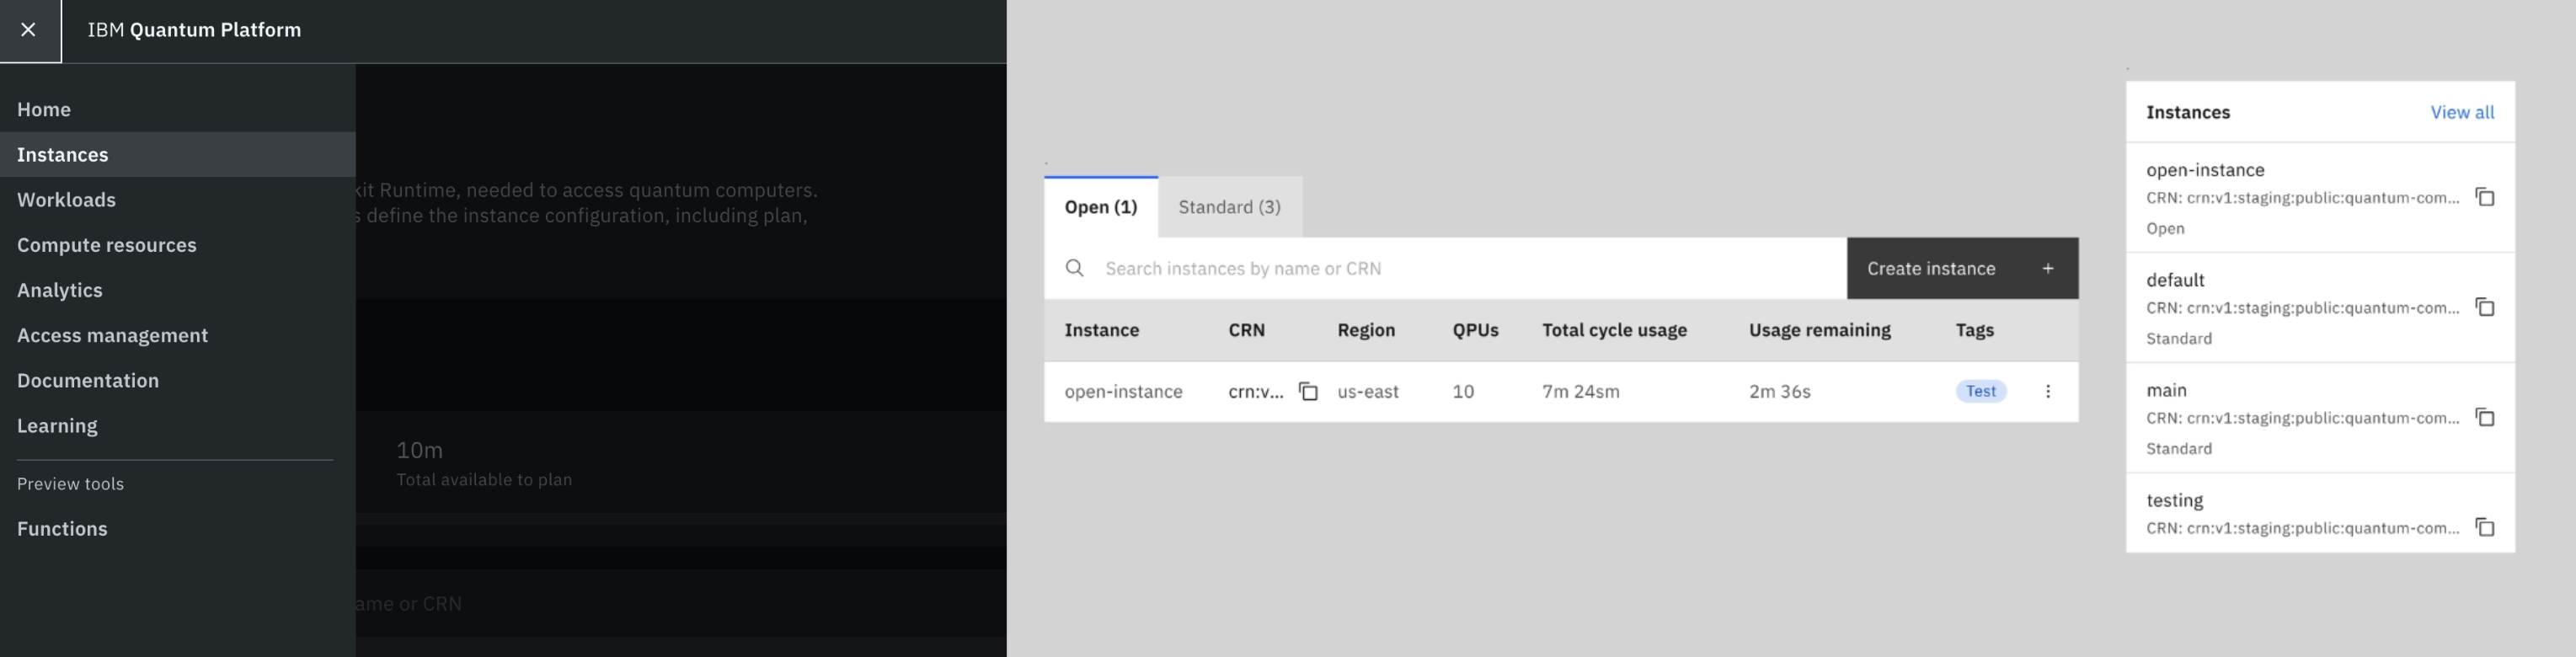

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your API key and crn and have access to the quantum computers
your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key,
    instance=your_crn,
    overwrite=True
)

In [17]:
# Check that the account has been saved properly
service = QiskitRuntimeService()
# service.saved_accounts()

In [5]:
# See backends you can use
service.backends()

[<IBMBackend('ibm_pittsburgh')>,
 <IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_kingston')>]

## 3. Your first Quantum Circuit

### Quantum circuits

The fundamental unit of Qiskit is the **quantum circuit**, which is a series of instructions that a quantum computer can use to work with quantum bits of information, also known as **qubits**. These qubits have special properties that enable quantum computers to approach problems differently than how your laptop or iPhone might. Qiskit is rapidly advancing as a technology -- while you can still manually design your quantum circuits and decide how you want it to run (and there are plenty of good reasons to do so), IBM Quantum also provides you with tools that simplify the process. For the sake of learning, we are going to design a very simple circuit and run it on a simulator.

We're breezing through this overview because, honestly, we could spend hours just explaining the basics of quantum information and computation. In fact, IBM Quantum has done this already, producing a [written course](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/single-systems/introduction) and a series of [video lectures](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO) devoted to the topic. If you need a refresher, check them out!

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_distribution

import numpy as np
from numpy import sqrt

### Basic Operations on Qubits and Measurements

### Writing down single-qubit states
Let us start by looking at a single qubit. The main difference between a classical bit, which can take the values 0 and 1 only, is that a quantum bit, or **qubit**, can be in the states $\vert0\rangle$, $\vert1\rangle$, as well as a linear combination of these two states. This feature is known as superposition, and allows us to write the most general state of a qubit as: 

$$\vert\psi\rangle = \sqrt{1-p}\vert0\rangle + e^{i \phi} \sqrt{p}  \vert1\rangle$$

If we were to measure the state of this qubit, we would find the result $1$ with probability $p$, and the result $0$ with probability $1-p$. As you can see, the total probability is $1$, meaning that we will indeed measure either $0$ or $1$, and no other outcomes exists.

In addition to $p$, you might have noticed another parameter above. The variable $\phi$ indicates the relative quantum phase between the two states $\vert0\rangle$ and $\vert1\rangle$. As we will discover later, this relative phase is quite important. For now, it suffices to note that the quantum phase is what enables interference between quantum states, resulting in our ability to write quantum algorithms for solving specific tasks.


### Visualizing quantum states
We visualize quantum states throughout this exercise using what is known as a `qsphere`. Here is how the `qsphere` looks for the states $\vert0\rangle$ and $\vert1\rangle$, respectively. Note that the top-most part of the sphere represents the state $\vert0\rangle$, while the bottom represents $\vert1\rangle$.


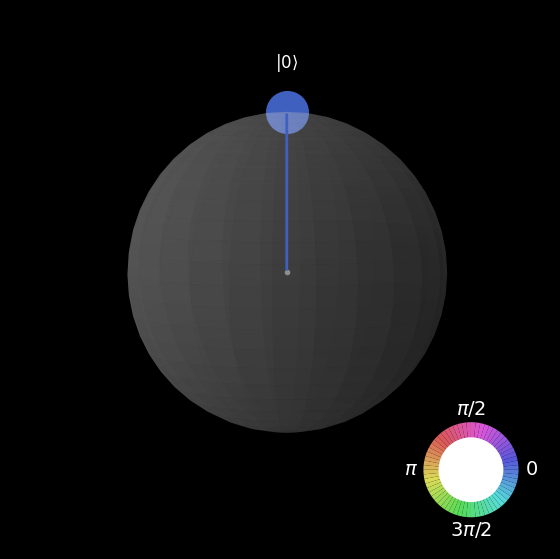

In [3]:
#visualize |0>
sv=Statevector([1, 0])
plot_state_qsphere(sv);

You can make the exactly same QSphere by using a quantum circuit. The statevector here we uses is from $|0\rangle$ state. In Qiskit, the qubit is initialized in $|0\rangle$ state. Try to run below circuit and see if you can get the same QSphere.

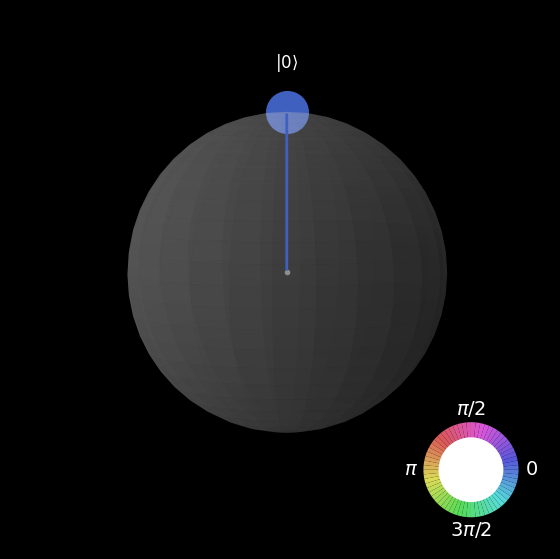

In [4]:
qc1 = QuantumCircuit(1)
sv=Statevector(qc1)
plot_state_qsphere(sv);

Now let's visualize $|1\rangle$ State. 

It should be no surprise that the superposition state with quantum phase $\phi = 0$ and probability $p = 1/2$ (meaning an equal likelihood of measuring both 0 and 1) is shown on the `qsphere` with two points. However, note also that the size of the circles at the two points is smaller than when we had simply $\vert0\rangle$ and $\vert1\rangle$ above. This is because the size of the circles is proportional to the probability of measuring each one, which is now reduced by half.


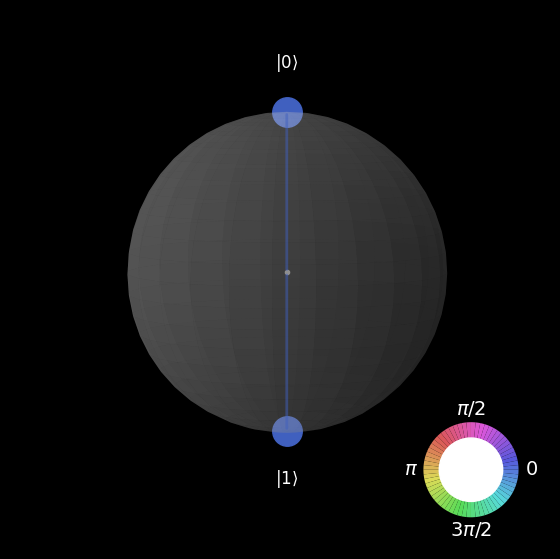

In [5]:
#visualize 1/sqrt(2)|0> + 1/sqrt(2)|1>

sv=Statevector([1/sqrt(2), 1/sqrt(2)])
plot_state_qsphere(sv);

In the case of superposition states, where the quantum phase is non-zero, the qsphere allows us to visualize that phase by changing the color of the respective blob. For example, the state with $\phi = 90^\circ$ (degrees) and probability $p = 1/2$ is shown in the `qsphere` below. 


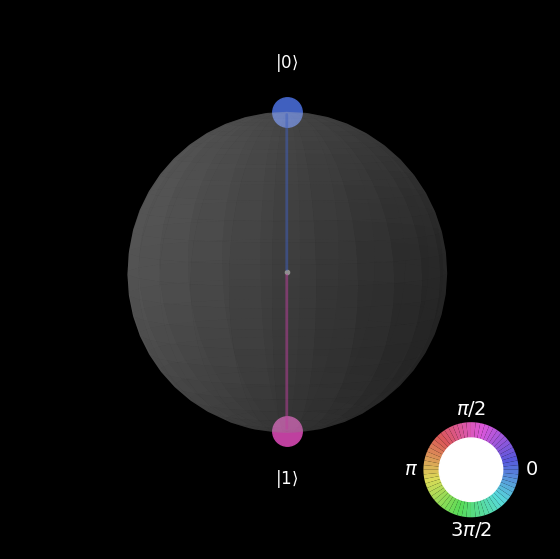

In [6]:
sv=Statevector([1/sqrt(2), 1/sqrt(2)*1j])
plot_state_qsphere(sv);

### Manipulating qubits
Qubits are manipulated by applying quantum gates. Let's go through an overview of the different gates that we will consider in the following exercises.

First, let's describe how we can change the value of $p$ for our general quantum state. To do this, we will use two gates:

1. **$X$-gate**: This gate flips between the two states $\vert0\rangle$ and $\vert1\rangle$. This operation is the same as the classical NOT gate. As a result, the $X$-gate is sometimes referred to as a bit flip or NOT gate. Mathematically, the $X$ gate changes $p$ to $1-p$, so in particular from 0 to 1, and vice versa.

2. **$H$-gate**: This gate allows us to go from the state $\vert0\rangle$  to the state $\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$. This state is also known as the $\vert+\rangle$. Mathematically, this means going from $p=0, \phi=0$ to  $p=1/2, \phi=0$.  As the final state of the qubit is a superposition of $\vert0\rangle$ and $\vert1\rangle$, the Hadamard gate represents a true quantum operation.


Notice that both gates changed the value of $p$, but not $\phi$. Fortunately for us, it's quite easy to visualize the action of these gates by looking at the figure below.


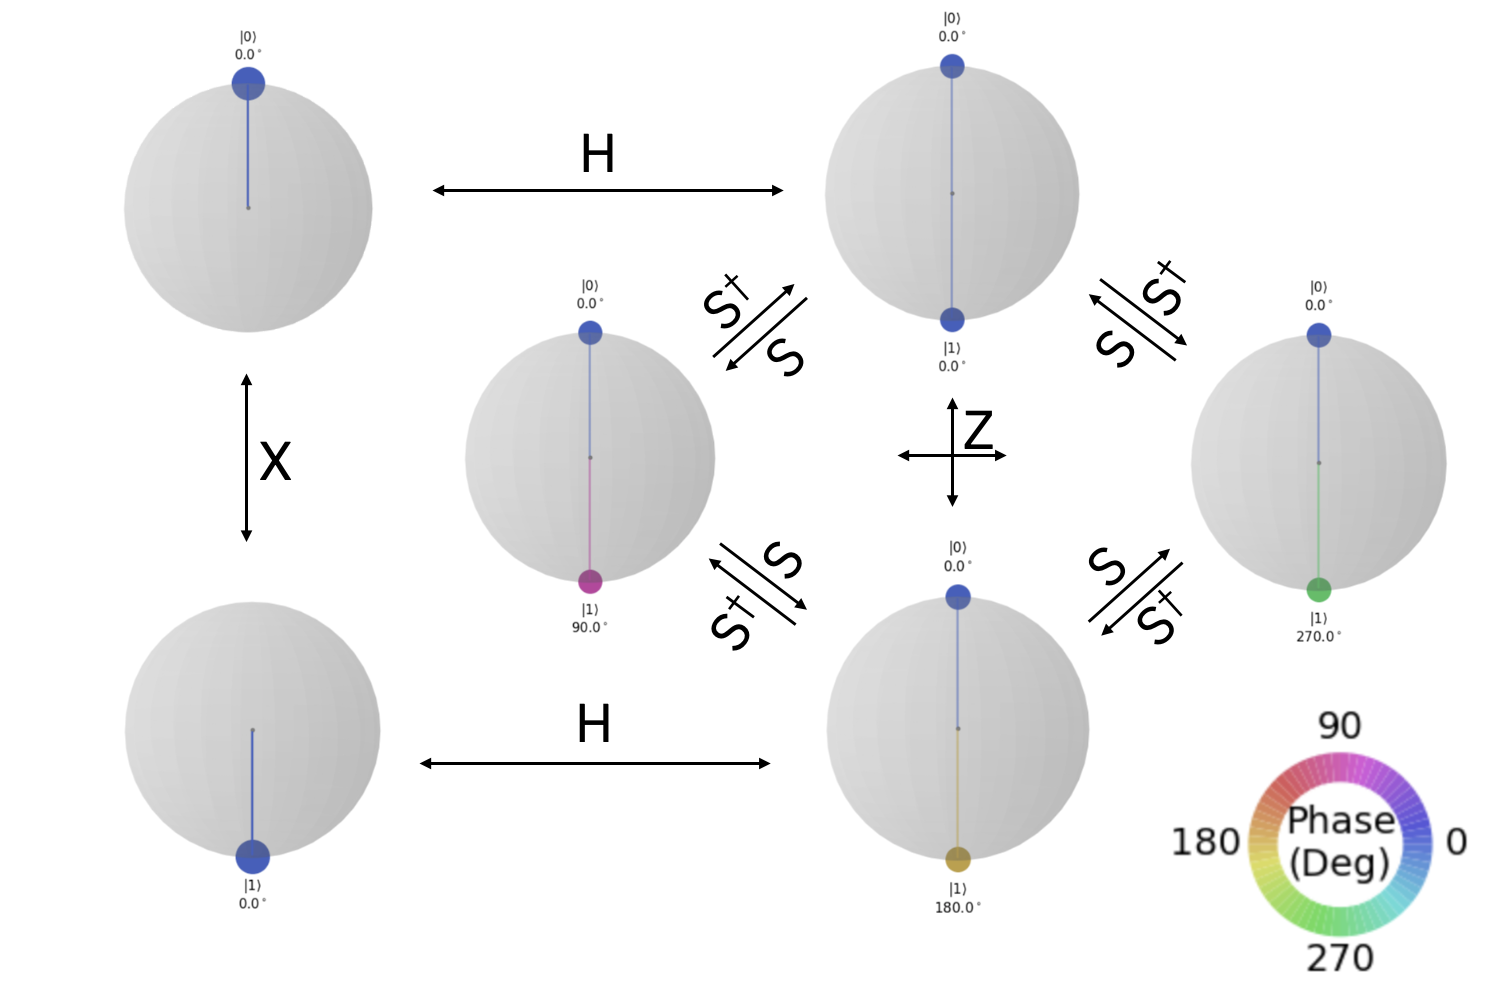

Once we have the state $\vert+\rangle$, we can then change the quantum phase by applying several other gates. For example, an $S$ gate adds a phase of $90$ degrees to $\phi$, while the $Z$ gate adds a phase of $180$ degrees to $\phi$. To subtract a phase of $90$ degrees, we can apply the $S^\dagger$ gate, which is read as S-dagger, and commonly written as `sdg`. Finally, there is a $Y$ gate which applies a sequence of $Z$ and $X$ gates.

You can experiment with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to become accustomed to the different operations and how they affect the state of a qubit. To do so, you can visit [Circuit Composer](https://quantum.cloud.ibm.com/composer) and start our circuit widget. After visiting the circuit composer, choose a gate to apply to a qubit, and then choose the qubit (in the first examples, the only qubit to choose is qubit 0).  Watch how the corresponding state changes with each gate, as well as the description of that state. It will also provide you with the code that creates the corresponding quantum circuit in Qiskit.

If you want to learn more about describing quantum states, Pauli operators, and other single-qubit gates, see [Quantum Information](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/single-systems/quantum-information) of the Single System of the [Basics of Quantum Information](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information) Course by John Watrous. 

### Practices:  Quantum Circuits Using Single-Qubit Gates

Here are four small practices to attain different states on the qsphere. You can either solve them with the circuit composer and copy and paste the code it provides into the respective cells to create the quantum circuits, or you can directly insert a combination of the following code lines into the program to apply the different gates: 

    qc.x(0)    # bit flip
    qc.y(0)    # bit and phase flip
    qc.z(0)    # phase flip
    qc.h(0)    # superpostion
    qc.s(0)    # quantum phase rotation by pi/2 (90 degrees)
    qc.sdg(0)  # quantum phase rotation by -pi/2 (90 degrees)
    
The '(0)' indicates that we apply this gate to qubit 'q0', which is the first (and in this case only) qubit.

Try to attain the given state on the qsphere in each of the following exercises.

#### i) Let us start  by performing a bit flip. The goal is to reach the state $\vert1\rangle$ starting from state $\vert0\rangle$. 


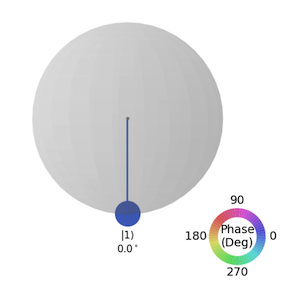

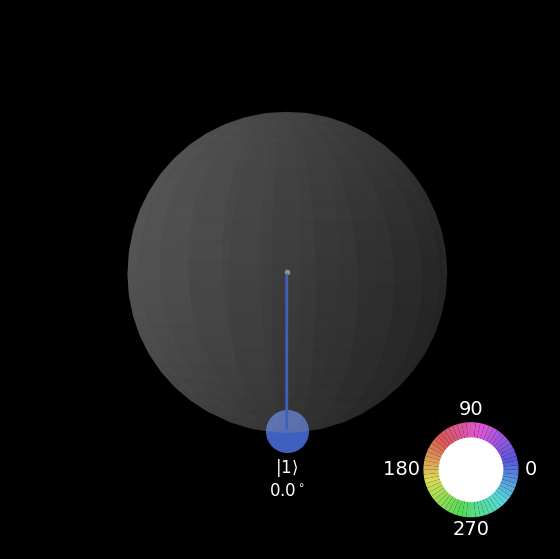

In [7]:

def create_circuit():
    qc = QuantumCircuit(1)

    qc.x(0)

    return qc

# check solution
qc2 = create_circuit()
state = Statevector(qc2)

plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True);

#### ii) Next, let's create a superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 

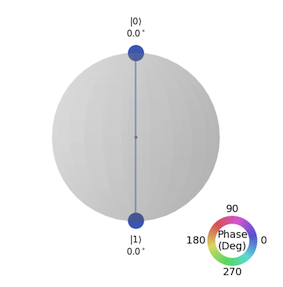

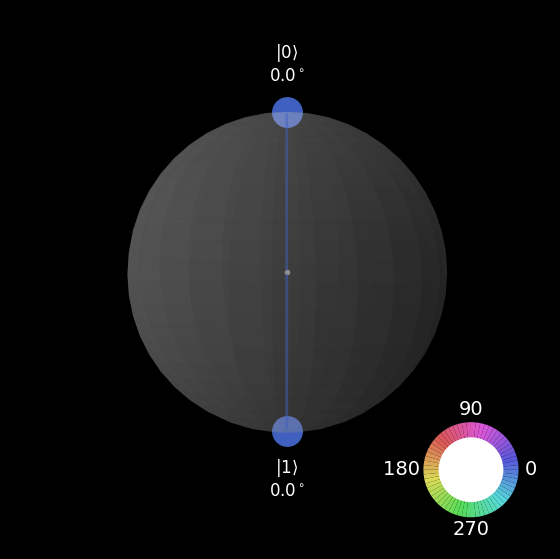

In [8]:

def create_circuit2():
    qc = QuantumCircuit(1)
    qc.h(0)
    return qc

qc3 = create_circuit2()
state = Statevector(qc3)
plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True);

#### iii) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

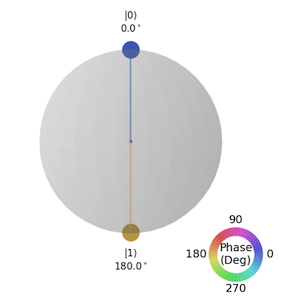

Can you combine the above two tasks to come up with the solution?

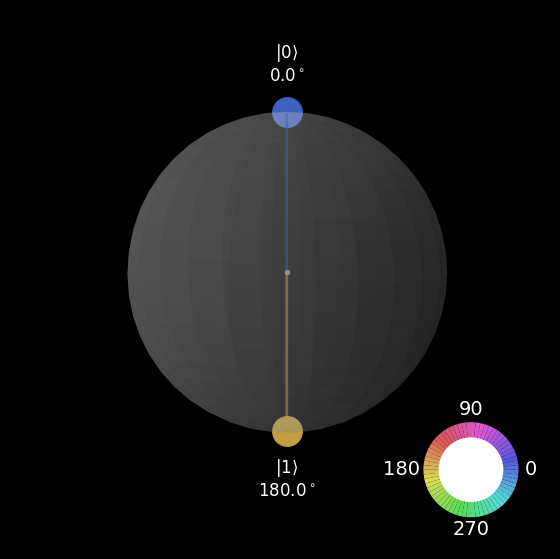

In [9]:
def create_circuit3():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    return qc

qc4 = create_circuit3()
state = Statevector(qc4)
plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True);

#### iv) Finally, we move on to the complex numbers. The goal is to reach the state $|\circlearrowleft\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$

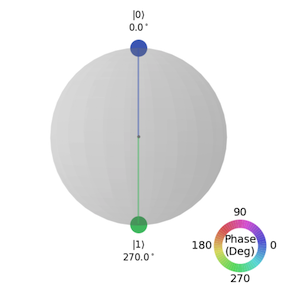

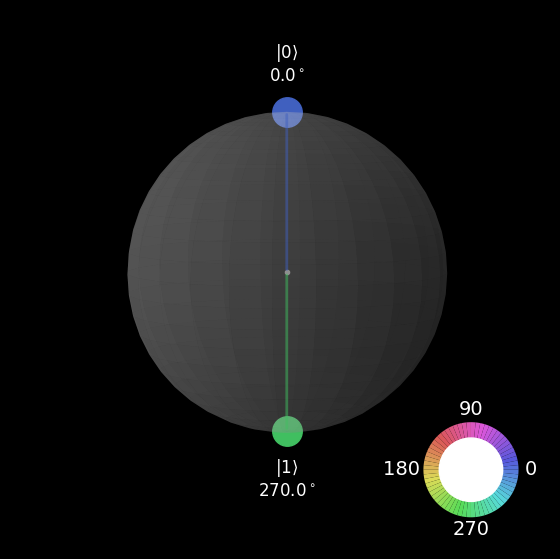

In [10]:
def create_circuit4():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.sdg(0)
    return qc

qc5 = create_circuit4()
state = Statevector(qc5)

plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True);

## 4. Quantum Quiz with Multi-Qubit Gates

Great job! Now that you've understood the single-qubit gates, let us look at gates operating on multiple qubits. Here you will be asked to solve 4 quantum state quizzes by combining single-qubit gates and multi-qubit gates. The basic gates on two qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

If you'd like to read more about the different multi-qubit gates and their relations, visit [Quantum Information](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/multiple-systems/quantum-information) of multiple systems, of John's `Basics of Quantum Information` Course.

Note that for two qubits a general state is of the form $a|00\rangle + b |01\rangle + c |10\rangle + d|11\rangle$, where $a$, $b$, $c$, and $d$ are complex numbers whose absolute values squared give the probability to measure the respective state; e.g., $|a|^2$ would be the probability to end in state '0' on both qubits. This means we can now have up to four points on the qsphere.

We start with the canonical two qubit gate, the controlled-NOT (also CNOT or CX) gate.  Here, as with all controlled two qubit gates, one qubit is labelled as the "control", while the other is called the "target". If the control qubit is in state $|0\rangle$, it applies the identity $I$ gate to the target, i.e., no operation is performed. Instead, if the control qubit is in state $|1\rangle$, an X-gate is performed on the target qubit. Therefore, with both qubits in one of the two classical states, $|0\rangle$ or $|1\rangle$, the CNOT gate is limited to classical operations.

This situation changes dramatically when we first apply a Hadamard gate to the control qubit, bringing it into the superposition state $|+\rangle$.  The action of a CNOT gate on this non-classical input can produce highly entangled states between control and target qubits. If the target qubit is initially in the $|0\rangle$ state, the resulting state is denoted by $|\Phi^+\rangle$, and is one of the so-called [Bell states](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/multiple-systems/quantum-information#bell-states). 

#### i) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.  

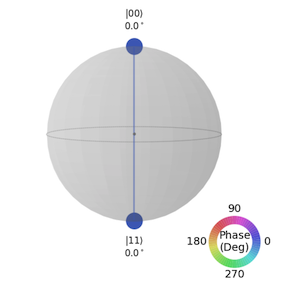


For this state we would have probability $\frac{1}{2}$ to measure "00" and probability $\frac{1}{2}$ to measure "11". Thus, the outcomes of both qubits are perfectly correlated.

<IPython.core.display.Latex object>

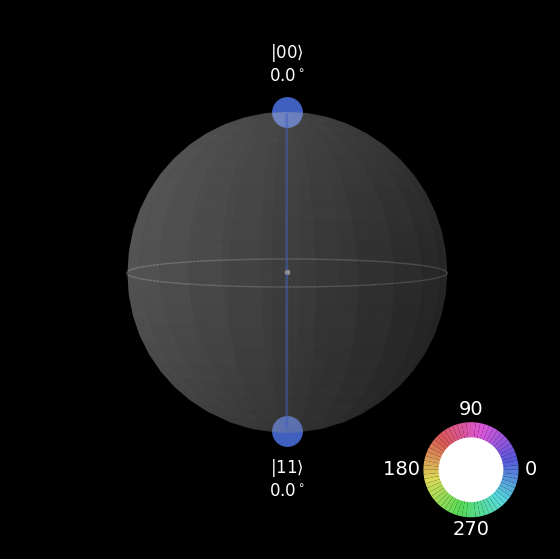

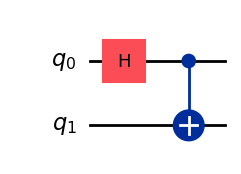

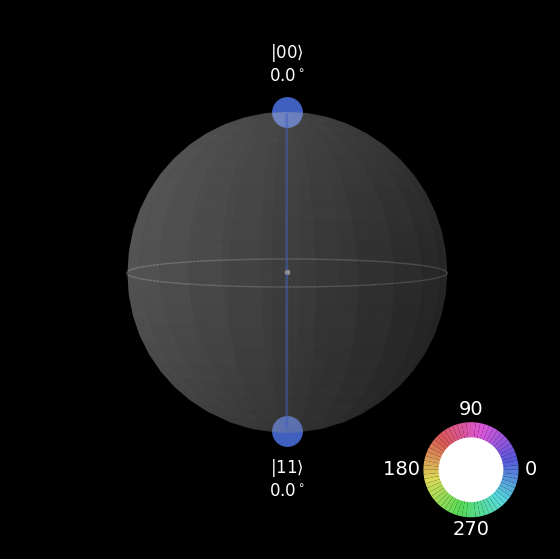

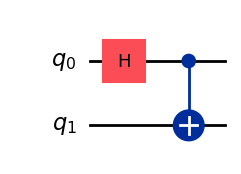

In [11]:

def create_circuit5():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

qc6 = create_circuit5()
state = Statevector(qc6) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True));
qc6.draw(output='mpl') # we draw the circuit

Next, try to create the state of perfectly anti-correlated qubits. Note the minus sign here, which indicates the relative phase between the two states. 

#### ii) Construct the Bell state $\vert\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$.

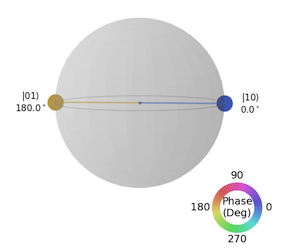

<IPython.core.display.Latex object>

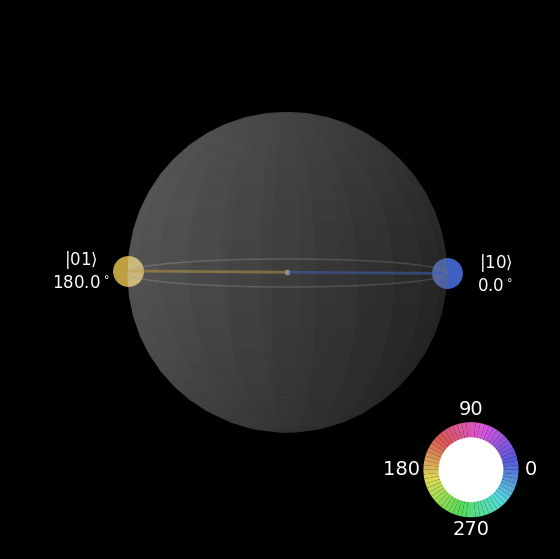

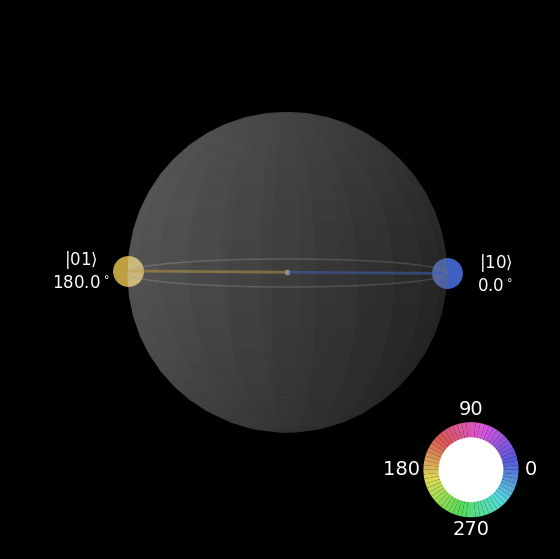

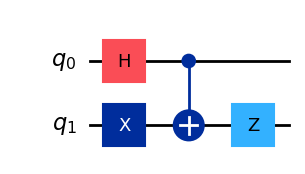

In [12]:

def create_circuit6():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.x(1)
    qc.cx(0, 1)
    qc.z(1)
    return qc

qc7 = create_circuit6()
state = Statevector(qc7) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc7.draw(output='mpl'); # we draw the circuit

### iii) You are given the quantum circuit described in the function below. Swap the states of the first and the second qubit to get this QSphere.

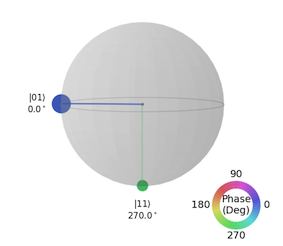

<IPython.core.display.Latex object>

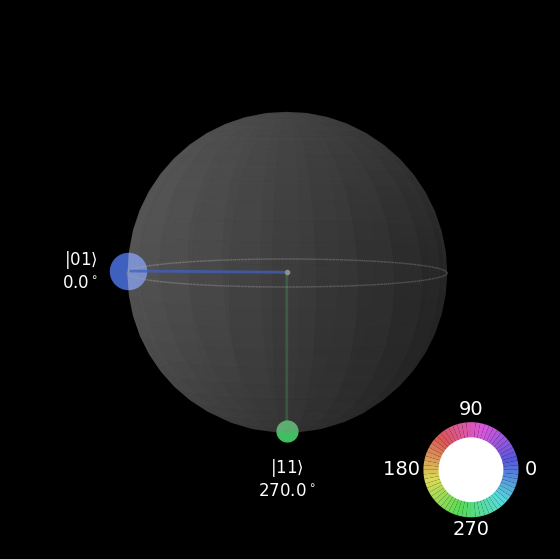

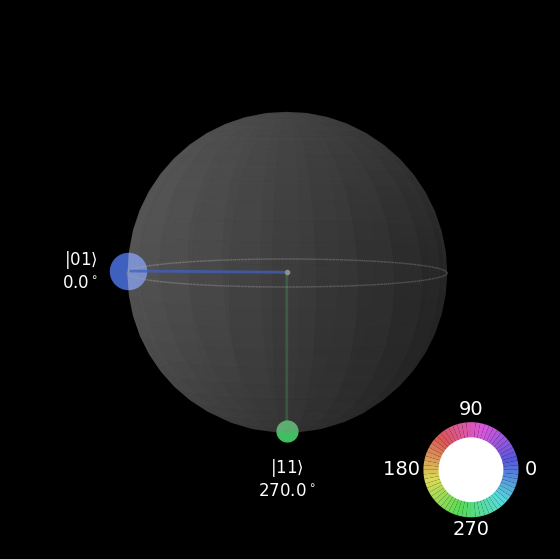

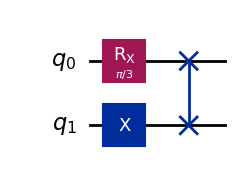

In [13]:

def create_circuit7():
    qc = QuantumCircuit(2)
    qc.rx(np.pi/3,0)
    qc.x(1)
    return qc

qc8 = create_circuit7()
qc8.swap(0,1)


state = Statevector(qc8) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc8.draw(output='mpl'); # we draw the circuit

#### iv) Write a program from scratch that creates the GHZ state (on three qubits), $\vert \text{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$

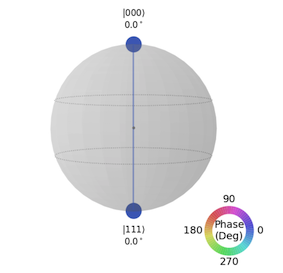

<IPython.core.display.Latex object>

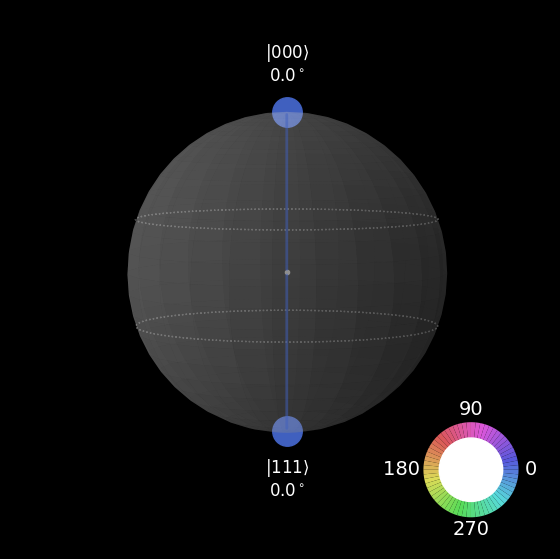

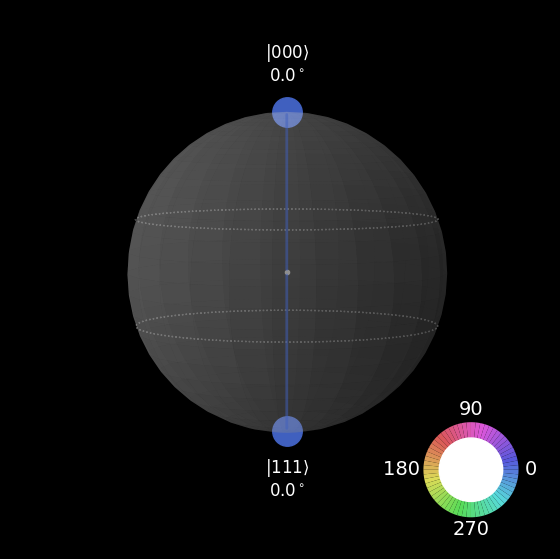

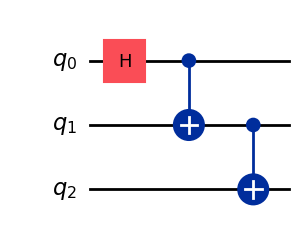

In [14]:
def create_circuit8():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    return qc

qc9 = create_circuit8()


pub4 = (qc9)

state = Statevector(qc9) # determine final state after running the circuit
display(array_to_latex(state))
display(plot_state_qsphere(state, show_state_labels=True, show_state_phases = True, use_degrees = True))
qc9.draw(output='mpl'); # we draw the circuit

## 5. Run your circuit and see the measured result with a real quantum computer

Now that we know how to build a quantum circuit to manipulate a statevector of qubits. And it is time for the most exciting part: running it and seeing the output! Here we'll learn the modern and effective way to execute our circuits using Qiskit.

### Primitives

Qiskit introduces abstractions called primitives for encapsulating the output of a quantum circuit. Currently, there are two primitives:
- **Sampler**: The output of the circuit is a (quasi-)probability distribution over measurement outcomes.
- **Estimator**: The output of the circuit is the expectation value of an observable, which must be provided in addition to the circuit.

Within Qiskit and the Qiskit Ecosystem, there are various concrete implementations of the primitives:
- Reference primitives included with [Qiskit](https://github.com/Qiskit/qiskit). These are useful for simulating the results of running small quantum circuits.
- Runtime primitives included with [Qiskit IBM Runtime](https://github.com/Qiskit/qiskit-ibm-runtime). These primitives are backed by real IBM Quantum hardware.
- Primitives in [Qiskit Aer](https://github.com/Qiskit/qiskit-aer). These primitives are backed by a high-performance quantum circuit simulator, and can handle larger circuits than the reference primitives and also model the effects of noise.





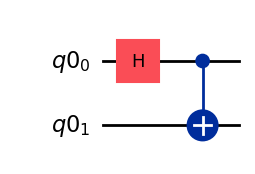

In [15]:
from qiskit import QuantumCircuit, QuantumRegister

# Initialize the qubits
qubits = QuantumRegister(2)

# Create the circuit
circuit = QuantumCircuit(qubits)

# Unpack the qubits
q0, q1 = qubits

# Add the Hadamard and CNOT gates to the circuit
circuit.h(q0)
circuit.cx(q0, q1)

circuit.draw('mpl');

### The Estimator Primitive

Let's begin with understanding how to use the `Estimator` primitive.  To start, we'll need to define the observable(s) we want to measure the expectation values of.  The observable is a quantum operator that can be represented using one of several classes from the `qiskit.quantum_info` module.  For this example we'll use a `SparsePauliOp` object to represent the observable $\langle II +XX -YY + ZZ\rangle$.

In [20]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])


Let's measure this observable using the reference Estimator primitive using the simulation package, `qiskit-aer`.

In [21]:
from qiskit_aer.primitives import EstimatorV2 as Estimator

estimator = Estimator()

job = estimator.run([(circuit, observable)])
result = job.result()
print(result)
print(f"Expectation Value of <II+XX-YY+ZZ> = {result[0].data.evs:.3f}")

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>)), metadata={'target_precision': 0.0, 'circuit_metadata': {}, 'simulator_metadata': {'time_taken_parameter_binding': 1.6843e-05, 'max_memory_mb': 32768, 'time_taken_execute': 0.000289762, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'parallel_experiments': 1}})], metadata={'version': 2})
Expectation Value of <II+XX-YY+ZZ> = 4.000


We'll now execute this circuit on real hardware using a Runtime primitive.  To do so, we'll need to initialize a `QiskitRuntimeService` object and select a backend to run the circuit on.  The access your institution has obtained will determine which backends are available to you.

In [ ]:
# Print the available backends
print("Available backends:")
for backend in service.backends():
    print(backend.name)

Available backends:
ibm_pittsburgh
ibm_fez
ibm_torino
ibm_marrakesh
ibm_kingston


For this example we'll use the 133-qubit `ibm_torino` backend.  You can obtain information about its status, the number of pending jobs, and detailed configuration information.

In [18]:
backend = service.backend("ibm_torino")


# Here we can get some status information about the backend
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print("Operational?: {} \n Jobs in Queue: {}\n".format(is_operational, jobs_in_queue))


# We can also obtain some configuration information
config = backend.configuration()
print(
    64 * "#",
    "\nConfiguration for: {}, version: {}".format(
        config.backend_name, config.backend_version
    ),
)
print("  Number of Qubits: {}".format(config.n_qubits))
print("  Basis Gates: {}".format(config.basis_gates))
print("  OpenPulse Enabled: {}".format(config.open_pulse))

Operational?: True 
 Jobs in Queue: 0

################################################################ 
Configuration for: ibm_torino, version: 1.0.102
  Number of Qubits: 133
  Basis Gates: ['cz', 'id', 'rz', 'sx', 'x']
  OpenPulse Enabled: False


Now we'll run our job on hardware.  However first we must ensure that this circuit is written in terms of the *Instruction Set Architecture* (ISA) of the backend.  This essentially means the circuit must be written in terms of the available basis gates of the backend we will submit to.

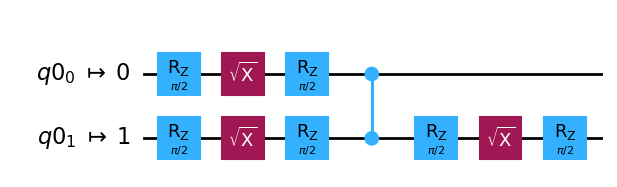

In [19]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Create a staged pass manager which will translate the circuit in terms of the basis gates of the backend
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_circuit = pm.run(circuit)

transpiled_circuit.draw('mpl', idle_wires=False);


We also have to ensure that the observable respects the layout of the circuit (i.e. the arrangement of hardware qubits we'll use).  This can be done using the `apply_layout()` method.

In [26]:
# Get the qubit layout from the transpiled circuit
layout = transpiled_circuit.layout

# Ensure the observables are formatted to respect this layout.  This will insert Identity gates on qubits where no expectation value is specified
observables = observable.apply_layout(layout)
# observables = [ [observable.apply_layout(layout) for observable in observable_set] for observable_set in observable   ]
print(observables)

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ'],
              coeffs=[ 1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j])


The `EstimatorV2` primitive takes its input in the form of a list of tuples containing a circuit, observables, and (optionally) parameters.  Each tuple is called as *Primitive Unitary Block* (PUB) and allows you to sweep across observables, parameters, and circuits in an efficient, vectorized way. 

In [30]:
# This import overwrites our previous Estimator import
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(mode=backend)
job = estimator.run([(transpiled_circuit, observables )])
id = job.job_id()
print(f">>> Job ID: {id}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d47rbinbjc5s73d55pk0
>>> Job Status: QUEUED


We can also check on the status on the online platform: [https://quantum.ibm.com/jobs](https://quantum.ibm.com/jobs)

Another useful feature is to be able to pull data from previous jobs you've run if you're running analysis on your results in a separate notebook or python script.  All that's needed is the Job ID

In [31]:
# Use a job id from a previous result
job = service.job(id) # You'll change this to your particular Job ID you'd like to examine
print(f">>> Job Status: {job.status()}")

>>> Job Status: DONE


The results are returned in the form of a `PrimitiveResult` object, which contains a list of `PubResults` for each of the individual tuples (i.e. PUBs) used when `estimator.run()` was called.  Each `PubResult` can be accessed by its index and contains information about the expectation values, standard deviation, and standard error.

In [32]:
# Examine our results once the job has completed
result = job.result()
print(f">>> {result} \n \n", 32*"#", "\n")
print(f" >>  Expectation values:\n {result[0].data.evs} \n\n >> Standard Deviation: {result[0].data.stds} \n\n")
print(f">> Ensemble Error {result[0].data.ensemble_standard_error} ")
print('\n', 32*"#", '\n')
print(f" >>  Metadata:\n {result[0].metadata} \n\n")

>>> PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(), dtype=float64>)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2}) 
 
 ################################ 

 >>  Expectation values:
 4.037305324157914 

 >> Standard Deviation: 0.03420719447009475 


>> Ensemble Error 0.031175726256706667 

 ################################ 

 >>  Metadata:
 {'shots': 409

### The Sampler Primitive

Next we'll demonstrate using the `Sampler` primitive.  We'll use the same quantum circuit as before, but this time we'll need to add measurement gates. Note that we didn't add measurement gates when using the Estimator primitive.

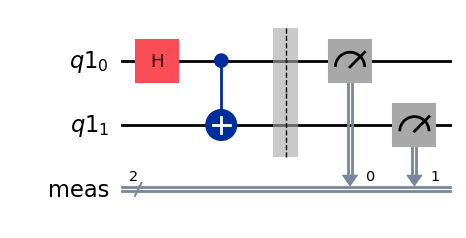

In [20]:
# Initialize the qubits
qubits = QuantumRegister(2)

# Create the circuit
circuit = QuantumCircuit(qubits)

# Unpack the qubits
q0, q1 = qubits

# Add the Hadamard and CNOT gates to the circuit
circuit.h(q0)
circuit.cx(q0, q1)

# Measure both qubits
circuit.measure_all()
circuit.draw("mpl");

Now we'll simulate this circuit using the reference Sampler primitive.

In [34]:
from qiskit_aer.primitives import Sampler

sampler = Sampler()

# Now run the job and examine the results
sampler_job = sampler.run(circuit)
result = sampler_job.result()
print(f"Job Result:\n>>> {result}")
print(f"  > Quasi-probability distribution (integer): {result.quasi_dists[0]}")
print(
    f"  > Quasi-probability distribution (bits): {result.quasi_dists[0].binary_probabilities(2)}"
)
print(f"  > Metadata: {result.metadata[0]}")

Job Result:
>>> SamplerResult(quasi_dists=[{3: 0.51953125, 0: 0.48046875}], metadata=[{'shots': 1024, 'simulator_metadata': {'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 16, 'parallel_shots': 1, 'sample_measure_time': 0.000871954, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001587574, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 32768, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}}])
  > Quasi-probability distribution (integer): {3: 0.51953125, 0: 0.48046875}
  > Quasi-probability distribution (bits): {'11': 0.51953125, '00': 0.48046875}
  > Metadata: {'shots': 1024, 'simulator_metadata': {'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 16, 'parallel_shots': 1, 'sample_measure_time': 0.000871954, 'noise': 'ideal', 'batch

Next we'll use the Runtime Sampler to run our circuit on a backend.  Recall that we still need to specify an `IBMBackend` object through the `QisktRuntimeService` and ensure the circuit is written in terms of the backend's ISA.

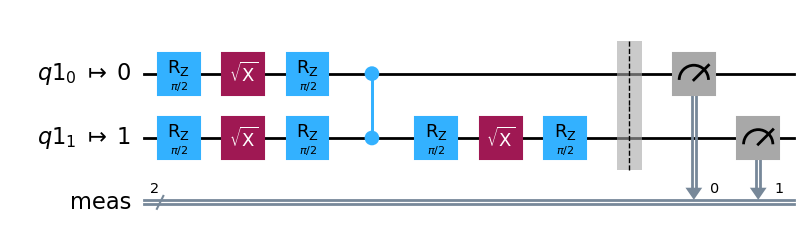

In [21]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Create a staged pass manager which will translate the circuit in terms of the basis gates of the backend
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_circuit = pm.run(circuit)

transpiled_circuit.draw('mpl', idle_wires=False);


In [36]:
# This import overwrites our previous Sampler import
from qiskit_ibm_runtime import SamplerV2 as Sampler


sampler = Sampler(mode=backend)
job = sampler.run([(transpiled_circuit, )])
id = job.job_id()
print(f">>> Job ID: {id}")
print(f">>> Session ID: {job.session_id}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d47rcql5mhvc73f89vk0
>>> Session ID: None
>>> Job Status: QUEUED


We can also obtain a previous result in the same way as the `Estimator`.

In [33]:
# Use a job id from a previous result
job = service.job(id)
print(f">>> Job Status: {job.status()}")

>>> Job Status: DONE


For the sampler primitive, the `PrimitiveResult` we get back has `PubResults` containing the raw count data obtained over all shots.  The `get_counts()` function will return 

In [34]:
result = job.result()
print(f"Job Result:\n>>> {result}")
print(f"  > Quasi-probability distribution (integer): {result[0].data.meas.get_counts()}")
print(f"  > Metadata: {result.metadata}")

Job Result:
>>> PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': {'__type__': 'ExecutionSpans', '__value__': {'spans': [DoubleSliceSpan(<start='2025-11-08 21:30:20', stop='2025-11-08 21:30:22', size=4096>)]}}}, 'version': 2})
  > Quasi-probability distribution (integer): {'00': 1955, '11': 1553, '10': 342, '01': 246}
  > Metadata: {'execution': {'execution_spans': {'__type__': 'ExecutionSpans', '__value__': {'spans': [DoubleSliceSpan(<start='2025-11-08 21:30:20', stop='2025-11-08 21:30:22', size=4096>)]}}}, 'version': 2}


We're also able to visualize the probability distribution of this circuit on a histogram.  Plotting this gives us a quick visual tool to help us understand what the states with the highest measurement probability are. 

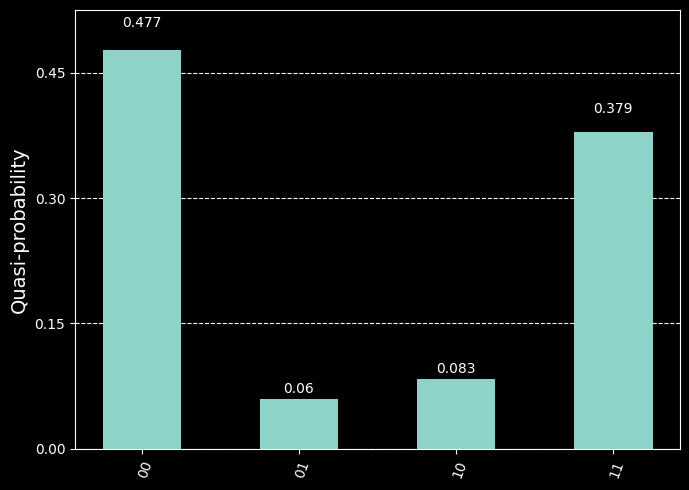

In [35]:
from qiskit.visualization import plot_distribution

import matplotlib.pyplot as plt

plt.style.use("dark_background")

# plot_distribution(result.quasi_dists[0])
plot_distribution(result[0].data.meas.get_counts());

## Configuring Runtime options

Oftentimes, the quantum circuits constructed for utility scale algorithms are not well optimized to run on noisy quantum hardware.  In fact, it may even be important to post-process your results using error mitigation techniques.  Fortunately, there are a few ways to implement both error mitigation as well as optimizations of your quantum circuits.

The first is to simply set a few Runtime configuration options; specifically the `optimization_level` and `resilience_level`.  These are both managed and included in a Runtime Primitive using its `.options` attribute or with the `EstimatorOptions` or `SamplerOptions` objects.

The options for `optimization_level` are:

| Optimization Level | Estimator & Sampler |
| :--- | :--- |
| 0 | No optimization: typically used for hardware characterization or debugging <br />    - Basis translation <br /> - Layout (`TrivialLayout`: virtual -> physical)  <br /> - Routing: `StochasticSwap` |
| 1, 2, 3 | Light optimization: <br /> - Layout (trivial → vf2 → SabreLayout if routing is required) <br /> - Routing (SabreSwap if needed) <br /> - 1Q gate optimization <br /> - Error suppression: dynamical decoupling |


And the options for `resilience_level` for the `Estimator` primitives will implement the following error mitigation techniques.

| Resilience Level | Definition | Estimator |
| :--- | :--- | :--- |
|0 | No mitigation	| None |
|1 [Default] |	Minimal mitigation costs: Mitigate error associated with readout errors | Twirled Readout Error eXtinction (TREX)<sup> [1](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.105.032620) </sup>	|
| 2 | Medium mitigation costs. Typically reduces bias in estimators, but is not guaranteed to be zero bias. | Level 1 + Zero Noise Extrapolation (ZNE)<sup>[3,](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.119.180509)[4](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.7.021050)</sup>  |	


Let's look at a quick example

In [40]:
from qiskit_ibm_runtime import EstimatorOptions, SamplerOptions

sampler_options = SamplerOptions()
estimator_options = EstimatorOptions()

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ'],
              coeffs=[ 1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j])


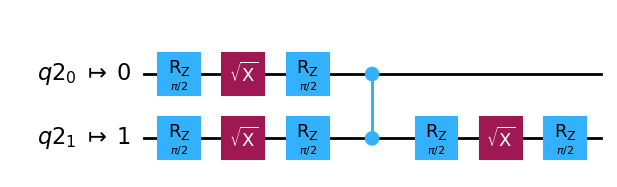

In [41]:
# We'll prepare the same example circuit as before
qubits = QuantumRegister(2)
circuit = QuantumCircuit(qubits)
q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)

# and use the same observable as before
observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])

# Create a staged pass manager which will translate the circuit in terms of the basis gates of the backend
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_circuit = pm.run(circuit)

transpiled_circuit.draw('mpl', idle_wires=False)


# Get the qubit layout from the transpiled circuit
layout = transpiled_circuit.layout

# Ensure the observables are formatted to respect this layout.  This will insert Identity gates on qubits where no expectation value is specified
observables = observable.apply_layout(layout)
# observables = [ [observable.apply_layout(layout) for observable in observable_set] for observable_set in observable   ]
print(observables)

In [43]:
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 2
job = estimator.run([(transpiled_circuit, observables)])
id = job.job_id()
print(f">>> Job ID: {id}")
print(f">>> Session ID: {job.session_id}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d47rd57bjc5s73d55r20
>>> Session ID: None
>>> Job Status: QUEUED


In [44]:
# Use a job id from a previous result
job = service.job(id)
print(f">>> Job Status: {job.status()}")

>>> Job Status: RUNNING


In [45]:
# Examine our results once the job has completed
result = job.result()
print(f">>> {result} \n \n", 32*"#", "\n")
print(f" >>  Expectation values:\n {result[0].data.evs} \n\n >> Standard Deviation: {result[0].data.stds}")
print('\n', 32*"#", '\n')
print(f" >>  Metadata:\n {result[0].metadata} \n\n")

>>> PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>), evs_noise_factors=np.ndarray(<shape=(3,), dtype=float64>), stds_noise_factors=np.ndarray(<shape=(3,), dtype=float64>), ensemble_stds_noise_factors=np.ndarray(<shape=(3,), dtype=float64>), evs_extrapolated=np.ndarray(<shape=(2, 4), dtype=float64>), stds_extrapolated=np.ndarray(<shape=(2, 4), dtype=float64>)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {'zne': {'extrapolator': 'multiple'}}, 'num_randomizations': 32})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': True, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': True, 

### Other Runtime Options

A quick note here: tuning the options for error mitigation are now quite granular with the V2 primitives, check the documentation pages for more information on using the [`EstimatorOptions`](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.options.EstimatorOptions) and [`SamplerOptions`](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.options.SamplerOptions) objects.

## Customizing transpilation

### Generate a preset staged pass manager

To create a preset staged pass manager with reasonable defaults, use the `generate_preset_pass_manager` function:

In [46]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)



The arguments to `generate_preset_pass_manager` match the arguments to the `transpile` function.

### Create your own pass manager

The `qiskit.transpiler.passes` module includes many transpiler passes that can be used to create pass managers. To create a pass manager, initialize a `PassManager` with a list of passes. For example, the following code creates a transpiler pass that merges adjacent two-qubit gates and then synthesizes them into a basis of $R_y$, $R_z$, and $R_{zz}$,  gates.

In [24]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import (
    Collect2qBlocks,
    ConsolidateBlocks,
    UnitarySynthesis,
)

basis_gates = ["rx", "ry", "rzz"]
translate = PassManager(
    [
        Collect2qBlocks(),
        ConsolidateBlocks(basis_gates=basis_gates),
        UnitarySynthesis(basis_gates),
    ]
)

To demonstrate this pass manager in action, test it on a two-qubit circuit consisting of a Hadamard followed by two adjacent CX gates:

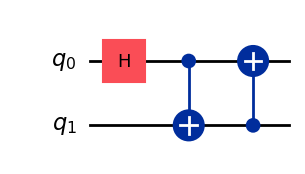

In [22]:
from qiskit import QuantumRegister, QuantumCircuit

qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)

a, b = qubits
circuit.h(a)
circuit.cx(a, b)
circuit.cx(b, a)

circuit.draw("mpl");

To run the pass manager on the circuit, call the `run` method.

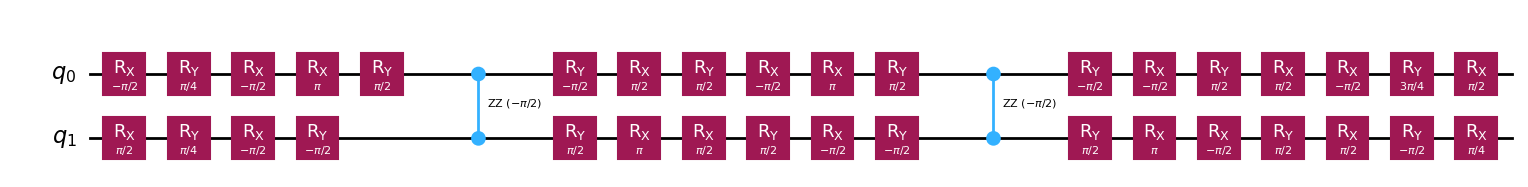

In [25]:
translated = translate.run(circuit)
translated.draw("mpl");

### Create a staged pass manager

A `StagedPassManager` is a pass manager that is composed of individual stages, where each stage is defined by a `PassManager` instance. You can create a `StagedPassManager` by specifying the desired stages. For example, the following code creates a staged pass manager with two stages, `init` and `translation`. The `translation` stage is defined by the pass manager that was created previously.

In [50]:
from qiskit.transpiler import PassManager, StagedPassManager
from qiskit.transpiler.passes import UnitarySynthesis, Unroll3qOrMore

basis_gates = ["rx", "ry", "rxx"]
init = PassManager(
    [
        UnitarySynthesis(basis_gates, min_qubits=3),
        Unroll3qOrMore(),
    ]
)
staged_pm = StagedPassManager(
    stages=["init", "translation"],
    init=init,
    translation=translate,
)

There is no limit on the number of stages you can put in a staged pass manager.

Another useful way to create a staged pass manager is to begin with a preset staged pass manager and then swap out some of the stages. For example, the following code generates a preset pass manager with optimization level 3, and then specifies a custom `pre_layout` stage.

In [52]:
import numpy as np
from qiskit.circuit.library import HGate, PhaseGate, RXGate, TdgGate, TGate
from qiskit.transpiler.passes import CommutativeCancellation, InverseCancellation

pass_manager = generate_preset_pass_manager(3, backend)
inverse_gate_list = [
    HGate(),
    (RXGate(np.pi / 4), RXGate(-np.pi / 4)),
    (PhaseGate(np.pi / 4), PhaseGate(-np.pi / 4)),
    (TGate(), TdgGate()),
]
logical_opt = PassManager(
    [
        CommutativeCancellation(),
        InverseCancellation(inverse_gate_list),
    ]
)

# Add pre-layout stage to run extra logical optimization
pass_manager.pre_layout = logical_opt

## Transpilation stages

Qiskit's prebuilt transpilation pipeline consists of six stages:

1. `init`
2. `layout`
3. `routing`
4. `translation`
5. `optimization`
6. `scheduling`

### Init stage

This first stage does very little by default and is primarily useful if you want to include your own initial optimizations.  Because most layout and routing algorithms are only designed to work with single- and two-qubit gates, this stage is also used to translate any gates that operate on more than two qubits into gates that only operate on one or two qubits.

### Layout stage
In the next stage, we start considering the layout or connectivity of the backend a circuit will be sent to.  In general, quantum circuits are abstract entities whose qubits are "virtual" or "logical" representations of actual qubits used in computations.  To execute a sequence of gates, a one-to-one mapping from the "virtual" qubits to the "physical" qubits in an actual quantum device is necessary.  This mapping is stored as a `Layout` object.


![Qubit mapping](./resources/layout-mapping.png)

The choice of mapping is extremely important for minimizing the number of SWAP operations needed to map the input circuit onto the device topology and ensure the most well-calibrated qubits are used.  Due to the importance of this stage, the preset pass managers try a few different methods to find the best layout.  Typically this involves two steps: first, try to find a "perfect" layout (a layout that does not require any SWAP operations), and then, a heuristic pass that tries to find the best layout to use if a perfect layout cannot be found.  There are two `Passes` typically used for this first step:

- `TrivialLayout`: Naively maps each virtual qubit to the same numbered physical qubit on the device (i.e. [`0`,`1`,`1`,`3`] -> [`0`,`1`,`1`,`3`]).  This is historical behavior only used in `optimzation_level=1` to try to find a perfect layout.  If it fails, `VF2Layout` is tried next.
- `VF2Layout`: This is an `AnalysisPass` that selects an ideal layout by treating this stage as a subgraph isomorphism problem, solved by the VF2++ algorithm.  If more than one layout is found, a scoring heuristic is run to select the mapping with the lowest average error.

Then for the heuristic stage, two passes are used by default:

- `SabreLayout`: This pass selects a layout by starting from an initial random layout and repeatedly running the `SabreSwap` algorithm.  This pass is only used in optimization levels 1, 2, and 3 if a perfect layout isn't found via the `VF2Layout` pass.  For more details on this algorithm, refer to the paper: [arXiv:1809.02573](https://arxiv.org/abs/1809.02573)
- `DenseLayout`: Finds the sub-graph of the device with the greatest connectivity and that has the same number of qubits as the circuit.  (Used for optimization level 1 if there are control flow operations (such as IfElseOp) present in the circuit).


### Routing stage

In order to implement a two-qubit gate between qubits that are not directly connected on a quantum device, one or more SWAP gates must be inserted into the circuit to move the qubit states around until they are adjacent on the device gate map.  Each SWAP gate represents an expensive and noisy operation to perform.  Thus, finding the minimum number of SWAP gates needed to map a circuit onto a given device is an important step in the whole transpilation process.  For efficiency, this stage is typically computed alongside the Layout stage by default, but they are logically distinct from one another.  The *Layout* stage selects the hardware qubits to be used, while the *Routing* stage inserts the appropriate amount of SWAP gates in order to execute the circuits using the selected layout.  It's also important to point out here that the `SabreSwap` algorithm is different from the larger `SabreLayout` method in the previous stage.  By default, `SabreLayout` runs both layout and routing, and returns the transformed circuit.  This is done for a few particular technical reasons specified in the pass's [API reference page](../api/qiskit/qiskit.transpiler.passes.SabreLayout). 

However, finding the optimal SWAP mapping is hard. In fact, it is an NP-hard problem, and is thus prohibitively expensive to compute for all but the smallest quantum devices and input circuits. To work around this, Qiskit uses a stochastic heuristic algorithm called SabreSwap to compute a good, but not necessarily optimal, SWAP mapping. The use of a stochastic method means that the circuits generated are not guaranteed to be the same over repeated runs. Indeed, running the same circuit repeatedly results in a distribution of circuit depths and gate counts at the output. It is for this reason that many users choose to run the routing function (or the entire StagedPassManager) many times and select the lowest-depth circuits from the distribution of outputs.



As an example to demonstrate this, consider the following GHZ circuit which we will assign a "bad" layout to and run the `SabreSwap` routing algorithm 100 times.

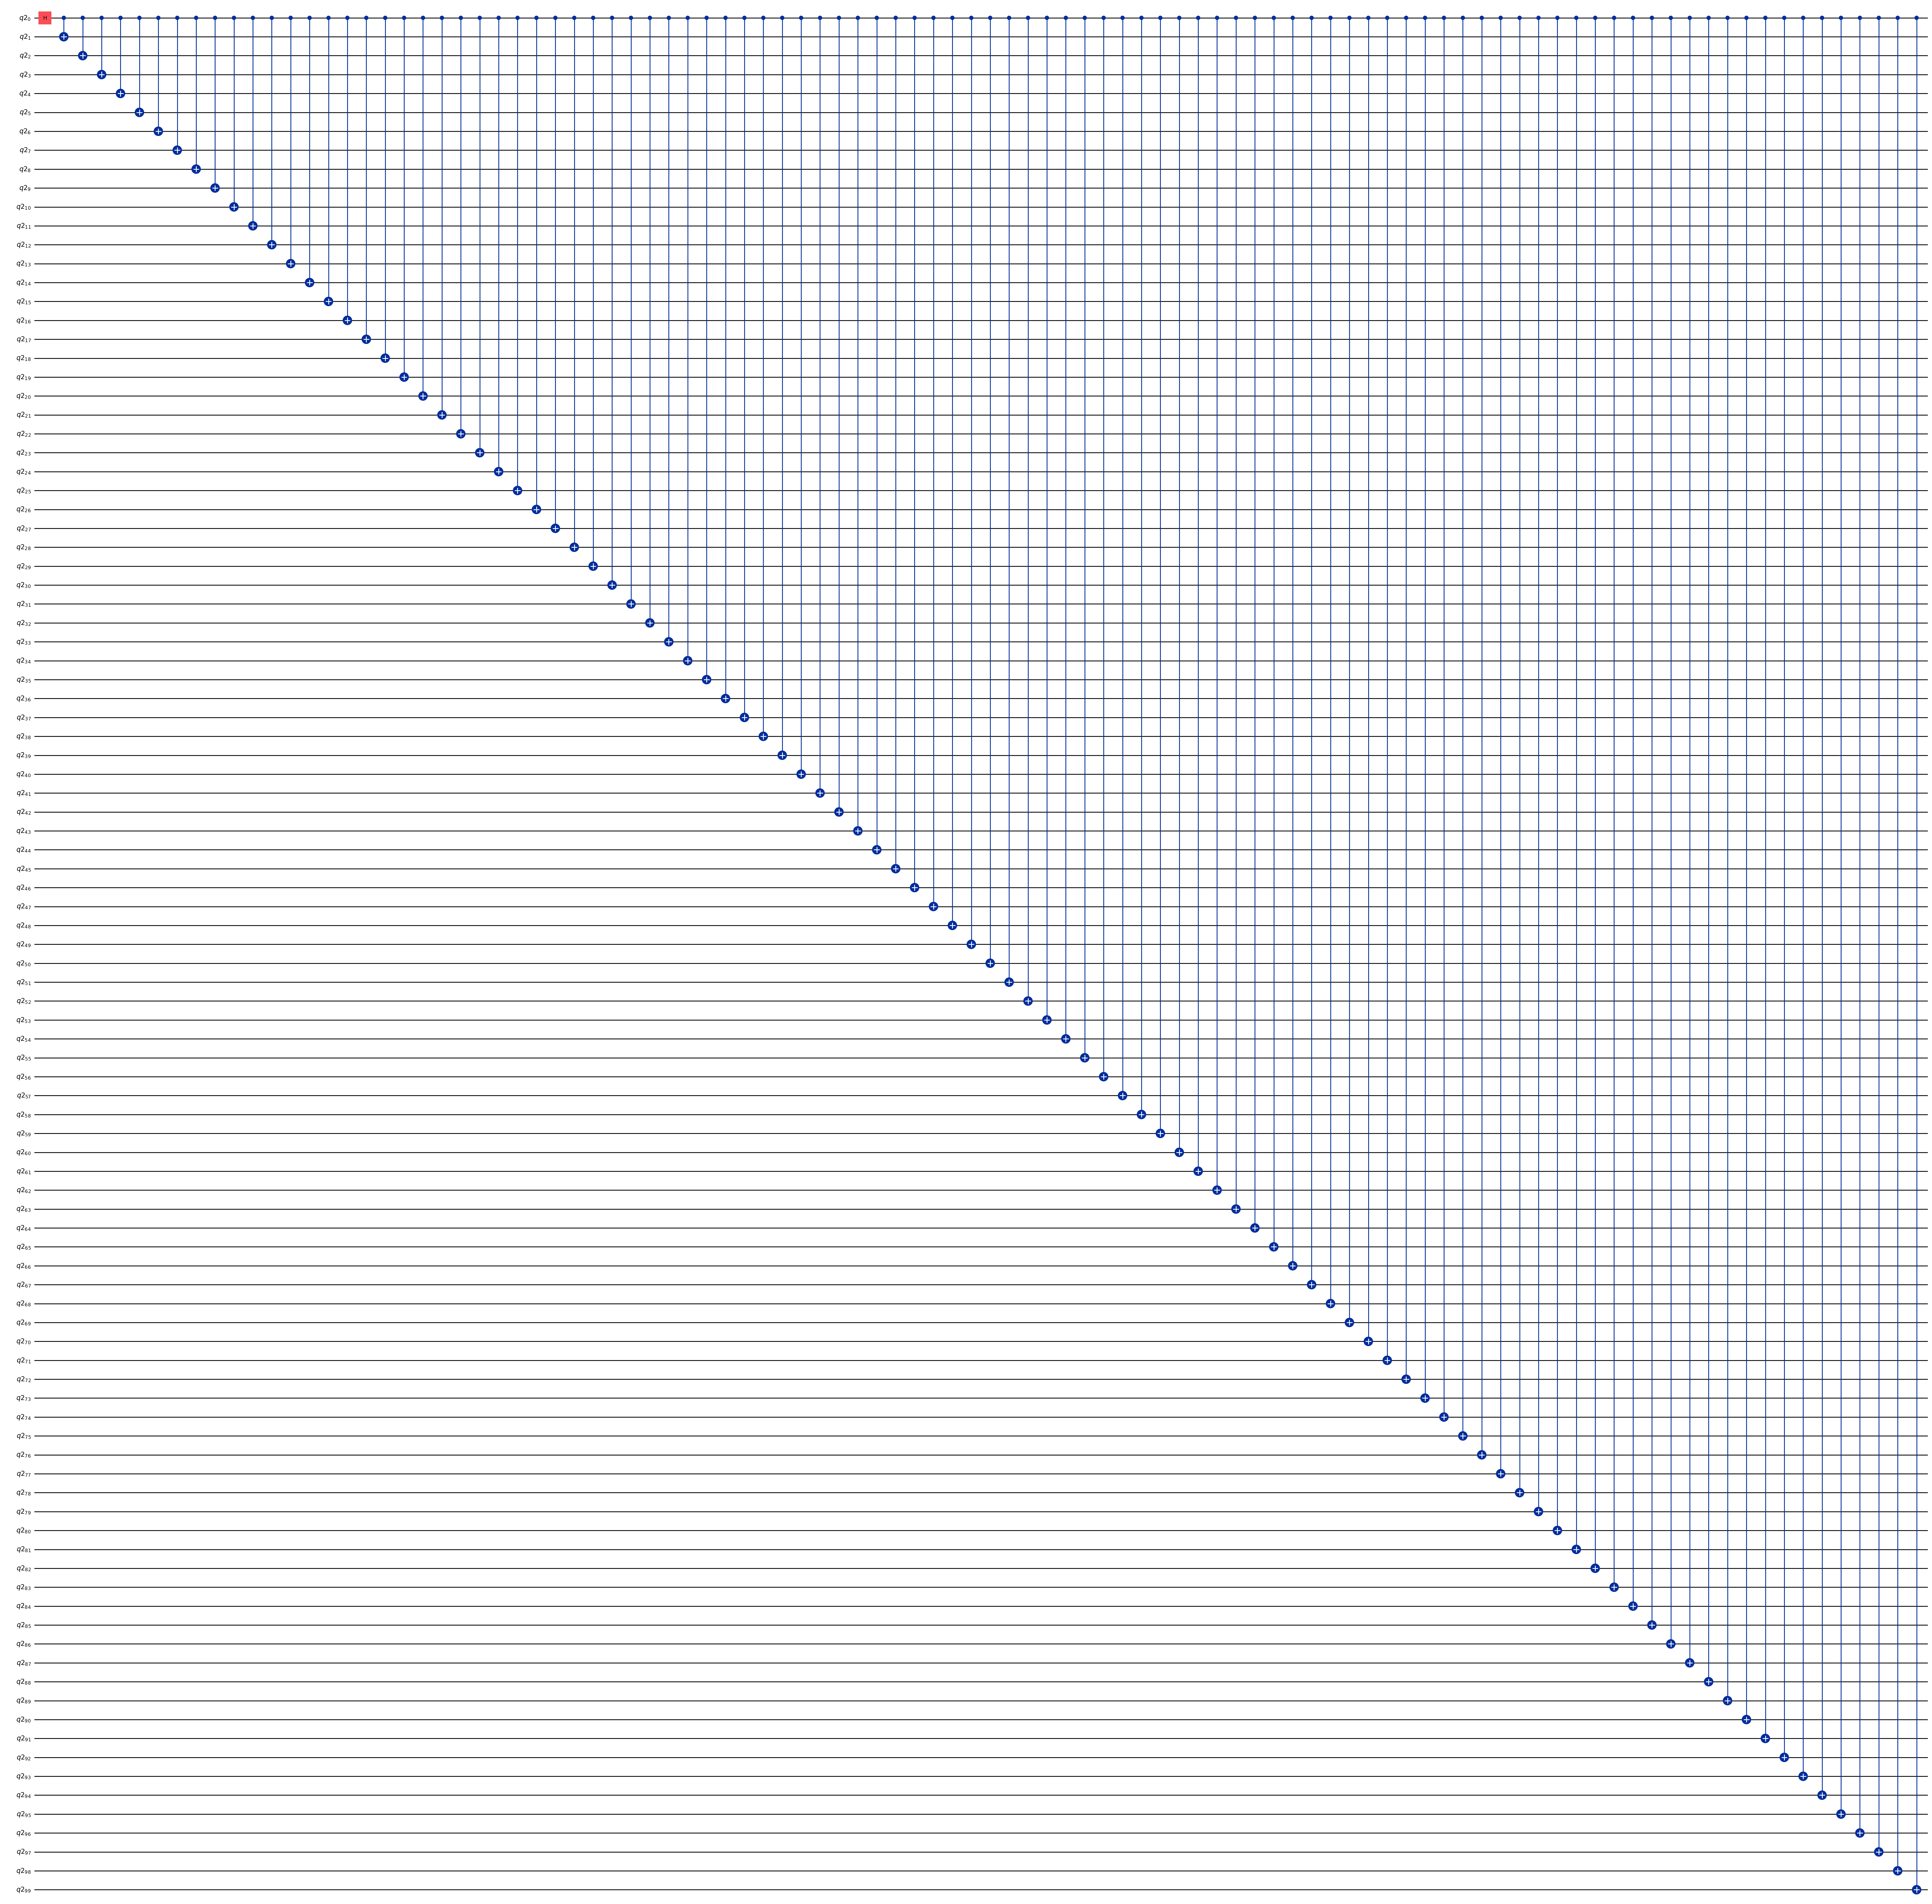

In [26]:
import matplotlib.pyplot as plt

qubits = QuantumRegister(100)
ghz = QuantumCircuit(qubits)
ghz.h(qubits[0])
ghz.cx(qubits[0], qubits[1:])

ghz.draw("mpl", fold=False);

Text(0, 0.5, 'Count')

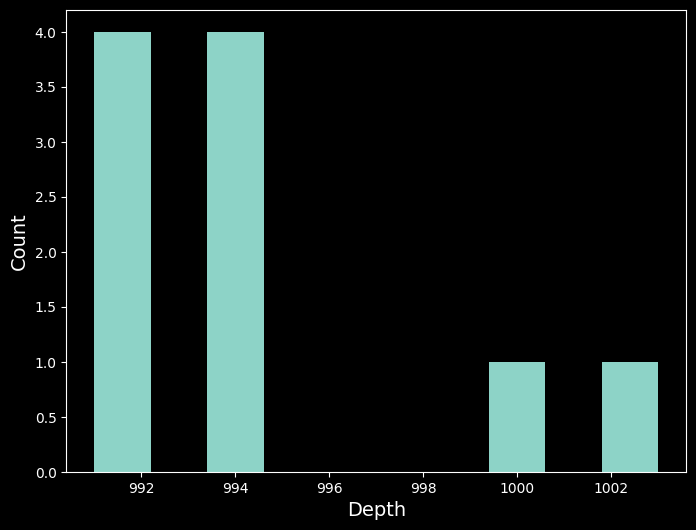

In [54]:
pass_manager = generate_preset_pass_manager(
    optimization_level=1,
    backend=backend,
    layout_method="trivial",  # Fixed layout mapped in circuit order
)
depths = []
for _ in range(10):
    depths.append(pass_manager.run(ghz).depth())

plt.figure(figsize=(8, 6))
plt.hist(depths)
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Count", fontsize=14)

As you can see, this distribution is quite wide which demonstrates the difficulty the SWAP mapper is having in computing the best layout.  In general, it is good practice to run this algorithm many times and select the circuit with the lowest depth.

### Translation stage

Next is the translation stage.  In general when writing a quantum circuit, you are free to use any quantum gate (unitary operation) that you like, along with a collection of non-gate operations such as qubit measurement or reset instructions.  However, most quantum devices only natively support a handful of quantum gate and non-gate operations. This stage of the preset `PassManagers`  translates (or *unrolls*) the gates specified in a circuit to the native basis gates of a specified backend.  This is an important step, as it allows the circuit to be executed by the backend, but typically leads to an increase in the depth and number of gates.

There two special cases which are especially important to highlight, and which help illustrate what this stage does:

1. If a SWAP gate is not a native gate to the target backend, this requires three CNOT gates:

['cz', 'id', 'delay', 'measure', 'reset', 'rz', 'sx', 'x', 'if_else']


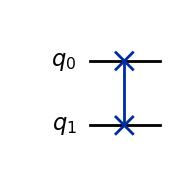

In [27]:
print(backend.configuration().supported_instructions)
circuit = QuantumCircuit(2)
circuit.swap(0, 1)
circuit.draw("mpl");

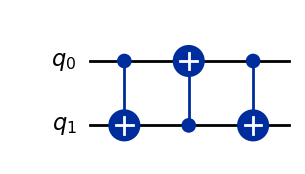

In [28]:
circuit.decompose().draw("mpl");

As a product of three CNOT gates, SWAPs are expensive operations to perform on noisy quantum devices.  However, such operations are usually necessary for embedding a circuit into the limited gate connectivities of many devices.  Thus, minimizing the number of SWAP gates in a circuit is a primary goal in the process of transpilation.

2. A Toffoli, or controlled-controlled-not gate (`ccx`), is a three-qubit gate.  Given that our basis gate set includes only single- and two-qubit gates, this operation must be decomposed.  However, it is quite costly:

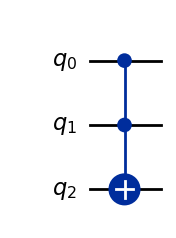

In [29]:
circuit = QuantumCircuit(3)
circuit.ccx(0, 1, 2)
circuit.draw("mpl");

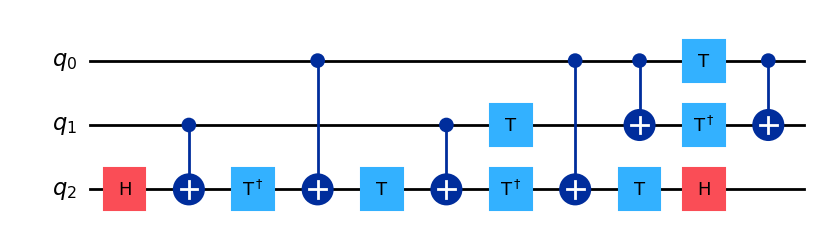

In [30]:
circuit.decompose().draw("mpl");

For every Toffoli gate in a quantum circuit, the hardware may execute up to six CNOT gates and a handful of single-qubit gates.  From this example, it should be clear that any algorithm that makes use of multiple Toffoli gates will end up as a circuit with large depth and will therefore be appreciably affected by noise.

### Optimization stage

This stage centers around decomposing quantum circuits into the basis gate set of the target device, and must fight against the increased depth from the layout and routing stages.  Fortunately, there are many routines for optimizing circuits by either combining or eliminating gates.  In some cases, these methods are so effective that the output circuits have lower depth than the inputs, even after layout and routing to the hardware topology.  In other cases, not much can be done, and the computation may be difficult to perform on noisy devices.  This stage is where the various optimization levels begin to differ.

- For `optimization_level=1`, this stage prepares the [`Optimize1qGatesDecomposition`](../api/qiskit/qiskit.transpiler.passes.Optimize1qGatesDecomposition) and [`CXCancellation`](../api/qiskit/qiskit.transpiler.passes.CXCancellation), which combine chains of single-qubit gates and cancel any back-to-back CNOT gates.
- For `optimization_level=2`, this stage uses the [`CommutativeCancellation`](../api/qiskit/qiskit.transpiler.passes.CommutativeCancellation) pass instead of `CXCancellation`, which removes redundant gates by exploiting commutation relations.
- For `optimization_level=3`, this stage prepares the following passes:
  - [`Collect2qBlocks`](../api/qiskit/qiskit.transpiler.passes.Collect2qBlocks)
  - [`ConsolidateBlocks`](../api/qiskit/qiskit.transpiler.passes.ConsolidateBlocks)
  - [`UnitarySynthesis`](../api/qiskit/qiskit.transpiler.passes.UnitarySynthesis)
  - [`Optimize1qGateDecomposition`](../api/qiskit/qiskit.transpiler.passes.Optimize1qGatesDecomposition)
  - [`CommutativeCancellation`](../api/qiskit/qiskit.transpiler.passes.CommutativeCancellation)


Additionally, this stage also executes a few final checks to make sure that all instructions in the circuit are composed of the basis gates available on the target backend.


To demonstrate, the following code constructs a 15-qubit GHZ state and compares the various `optimization_levels` of transpilation in terms of the resulting circuit depth, gate counts, and multi-qubit gate counts.

ERROR:stevedore.extension:Could not load 'hamiltonian_simulation': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'rustiq': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'PauliEvolution.aa_rustiq_pauli_evolution': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'PauliEvolution.rustiq_pauli_evolution': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'hamiltonian_simulation': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'rustiq': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'PauliEvolution.aa_rustiq_pauli_evolution': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'PauliEvolution.rustiq_pauli_evolution': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'PauliEvolution.aa_rustiq_pauli_evolution': No module named 'rustiq_plugin'
ERROR:stevedore.extension:Could not load 'PauliEvolution.

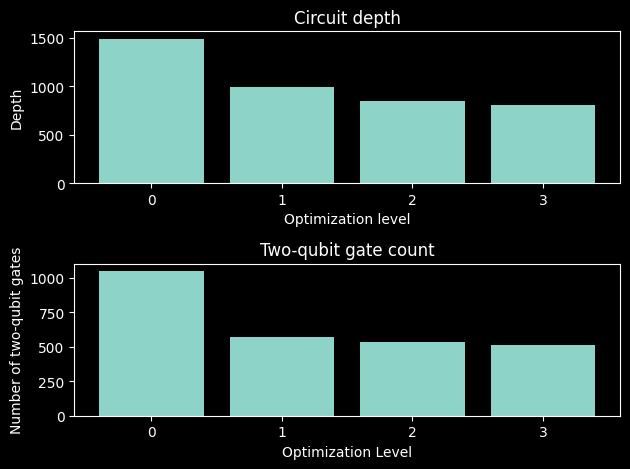

In [31]:
depths = []
gate_counts = []
multiqubit_gate_counts = []
levels = [str(x) for x in range(4)]
for level in range(4):
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
    )
    circuit = pass_manager.run(ghz)
    depths.append(circuit.depth())
    multiqubit_gate_counts.append(circuit.count_ops()["cz"])

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label="Depth")
ax1.set_xlabel("Optimization level")
ax1.set_ylabel("Depth")
ax1.set_title("Circuit depth")
ax2.bar(levels, multiqubit_gate_counts)
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of two-qubit gates")
ax2.set_title("Two-qubit gate count")
fig.tight_layout()
plt.show();

### Scheduling

This last stage is only run if it is explicitly called for (similar to the `Init` stage) and does not run by default (though a method can be specified by setting the scheduling_method argument when calling generate_preset_pass_manager). The scheduling stage is typically used once the circuit has been translated to the target basis, mapped to the device, and optimized. These passes focus on accounting for all the idle time in a circuit. At a high level, the scheduling pass can be thought of as explicitly inserting delay instructions to account for the idle time between gate executions and to inspect how long the circuit will be running on the backend.


# Resources

If you'd like to learn more about the Qiskit SDK, the Qiskit ecosystem, or tutorials/how-to guides these links will help you along your way.

- Qiskit Documentation: https://docs.quantum.ibm.com/

- Qiskit Ecosystem: https://qiskit.github.io/ecosystem/

- IBM Quantum Learning Platform: https://learning.quantum.ibm.com/

**Created by:**  Mirko Amico and Sophy Shin


<div class="alert alert-info">

© IBM Corp., 2025

This is licensed under the Apache License, Version 2.0. You may obtain a copy of this license in the LICENSE file in the root directory of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.

Any modifications or derivative works of this must retain this copyright notice, and modified files need to carry a notice indicating that they have been altered from the originals.
</div>